In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Documents/workspace/outputs/voxelstrace_case_1_4_3_keep_Jul_06_2020_02:50:32.csv'
memory_filepath = '/home/user/Documents/workspace/outputs/memorytrace_case_1_4_3_keep_Jul_06_2020_02:50:32.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,2744000
1,1744000
2,4488000
3,3488000
4,6232000


In [4]:
print(len(vox_data.index))

2000


In [10]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,0.000011
1,0.000007
2,0.000018
3,0.000014
4,0.000025
5,0.000017
6,0.000028
7,0.000024
8,0.000035
9,0.000027


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,1560.382812,1475.25
1,1560.382812,1475.25
2,1778.417969,1475.25
3,1989.050781,1475.25
4,2152.101562,1474.25


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,1560.0,1475.0
1,1560.0,1475.0
2,1778.0,1475.0
3,1989.0,1475.0
4,2152.0,1474.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,1475.0
1,0.0,1475.0
2,218.0,1475.0
3,429.0,1475.0
4,592.0,1474.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

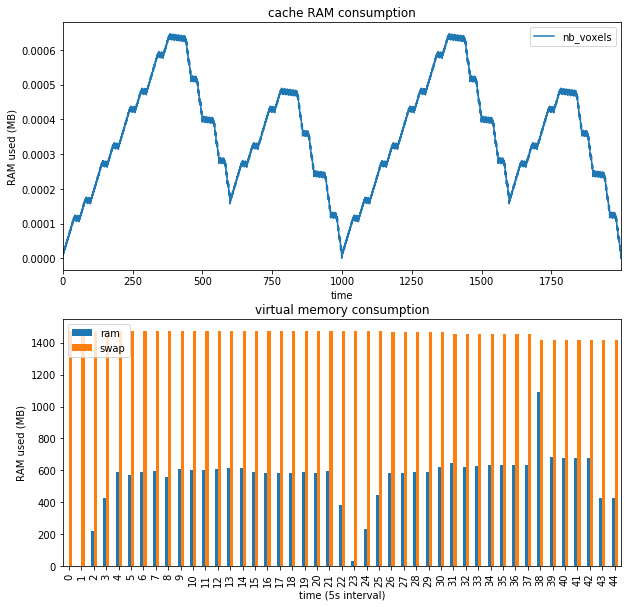

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')